# End to End project UCI Credit Card Default 

Usual Libraries plus:
Sk-learn

"First ML pipline"

Data can be found:

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

BKLADNK

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

## 1) Look at the bigger problem:
- Frame the problem
- Select a performance measure / measures

## 2) Import data

## 3) Explore the data:
- Misisng values
- Outlier check
- Relevant insights
- Data structure
- Look for correlations
- Experiment with attribute combinations

## 4) Split data into test and training data

## 5) Prepare the data
- Data cleaning 
- Handling test and categorical attributes
- Feature Scaling
- Custom Transformers

## 6) Select and train a model
- Training and evaluating on the Training set
- Better evaluation using cross-validation

## 7) Fine tune your model
- Grid search
- Ensemble methods
- Randomized search
- Analyse the best models and their errors

## 8) Evaluate system on the Test set

## 9) Future reseach

-

-

## 1) Look at the bigger problem:
- Frame the problem
- Select a performance measure / measures

## Credit Card Default, Industry approaches in clude LDA, 

Approach: accuracy, interpretability, and efficiency
    
Receiver Operating Characteristic (ROC) curve plots true positive rate against the false positive rate. 

AUC statistics = Area under ROC curve, False positives and true 

## 2) Import data

In [34]:
train = pd.read_csv('/Users/bakerkagimu/desktop/dataset/CreditCard_train.csv', index_col=0, header=1)
train.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
test = pd.read_csv("/Users/bakerkagimu/desktop/dataset/CreditCard_test.csv", index_col=0, header=1)
test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
24001,50000,1,2,2,23,2,2,0,0,0,...,44116,21247,20066,8,2401,2254,2004,704,707,0
24002,60000,1,2,2,26,0,0,0,0,0,...,55736,26958,28847,2282,2324,2049,2000,3000,1120,1
24003,400000,1,2,2,27,0,0,0,0,0,...,10745,20737,9545,2501,10009,1437,1105,510,959,0
24004,20000,1,5,2,27,5,4,3,2,2,...,19709,20113,19840,0,0,0,900,0,0,0
24005,50000,1,3,2,27,0,0,-2,-2,-1,...,0,70,120,0,100,0,70,200,100,0


## 3) Explore the data:
- Misisng values
- Outlier check
- Relevant insights
- Data structure
- Look for correlations
- Experiment with attribute combinations

## AGE

In [45]:
train.AGE.describe()

count    24000.000000
mean        35.380458
std          9.271050
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [38]:
train.AGE.head()

ID
1    24
2    26
3    34
4    37
5    57
Name: AGE, dtype: int64

Could Put AGE it into bins 

## Education

In [43]:
# inspect
train.EDUCATION.value_counts()

2    11360
1     8443
3     3850
5      207
4       92
6       37
0       11
Name: EDUCATION, dtype: int64

## Oversampling

AttributeError: module 'matplotlib' has no attribute 'xlabel'

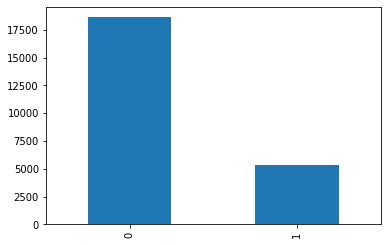

In [60]:
# plot class imbalance
pd.value_counts(train['default payment next month']).plot.bar()
plt.xlabel("Class")
plt.ylabel("Number of Clients")
plt.show()

Large bias, therefore oversampling required of Default cases, = 1

Would Use SMOTE to Oversaple

## Correlation Matrix

Text(0.5, 1, 'CORRELATION MATRIX - HEATMAP')

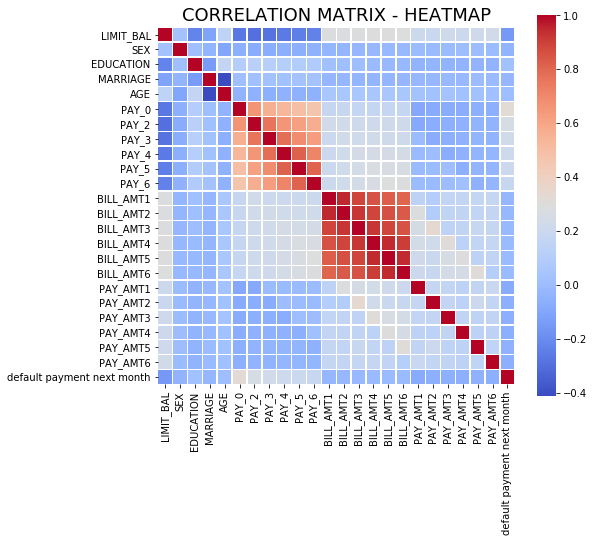

In [65]:
correlation_matrix = train.corr()
f, ax = plt.subplots(figsize =(8,7))
sns.heatmap(correlation_matrix, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

ref: seaborn

Bill amounts are highly correlated

Some correlation within payments

## 4) Split data

In [71]:
X = train.copy()
X.drop('default payment next month', axis = 1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23996,80000,1,2,1,25,1,2,2,0,0,...,80903,80215,63296,49854,3800,6,3636,2646,2000,1830
23997,20000,1,2,1,25,0,0,0,0,0,...,17562,17322,17119,17350,1552,2659,1419,606,500,1000
23998,10000,1,2,2,26,0,0,0,0,0,...,9825,17506,16608,9176,1300,2200,1300,320,1820,1000


In [78]:
Y = train['default payment next month']
Y

ID
1        1
2        1
3        0
4        0
5        0
        ..
23996    0
23997    0
23998    0
23999    0
24000    1
Name: default payment next month, Length: 24000, dtype: int64

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
y_train

ID
1533     0
2163     0
12304    0
10988    0
6277     0
        ..
18068    0
1681     1
684      0
2389     0
4337     1
Name: default payment next month, Length: 19200, dtype: int64

## 5) Prepare the data
- Data cleaning 
- Handling test and categorical attributes
- Feature Scaling
- Custom Transformers

## 6) Select and train a model
- Training and evaluating on the Training set
- Better evaluation using cross-validation


Here we use LR

Estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. 

C, reg parameter

Could compare with 
LDA
SVM

In [101]:
from sklearn.model_selection import ParameterGrid

# For Hyperparameter grid
param_grid = {'C': np.logspace(-5, 8, 15)}

LR = sklearn.linear_model.LogisticRegression()

## 7) Fine tune your model
- Grid search
- Ensemble methods
- Randomized search
- Analyse the best models and their errors

Here we will use Randomized search for the hyperparameters

In [117]:
LR_cv = sklearn.model_selection.RandomizedSearchCV(LR, param_grid , cv=5, random_state=0)

LR.fit(x_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(LR_cv.best_estimator_)) 

/Users/bakerkagimu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

Accuracy: 0.775625

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3726
           1       0.00      0.00      0.00      1074

    accuracy                           0.78      4800
   macro avg       0.39      0.50      0.44      4800
weighted avg       0.60      0.78      0.68      4800




/Users/bakerkagimu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


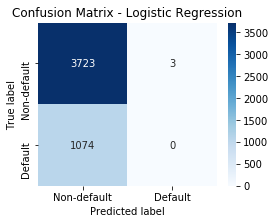

In [158]:
LR1 = sklearn.linear_model.LogisticRegression(C=0.00005, random_state=0)
LR1.fit(x_train, y_train)
y_pred = LR1.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

print()
print(classification_report(y_test, y_pred))
print()

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR1.predict(x_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

#ref: https://www.kaggle.com/selener/prediction-of-credit-card-default

## 8) Evaluate system on the Test set

In [137]:
test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
24001,50000,1,2,2,23,2,2,0,0,0,...,44116,21247,20066,8,2401,2254,2004,704,707,0
24002,60000,1,2,2,26,0,0,0,0,0,...,55736,26958,28847,2282,2324,2049,2000,3000,1120,1
24003,400000,1,2,2,27,0,0,0,0,0,...,10745,20737,9545,2501,10009,1437,1105,510,959,0
24004,20000,1,5,2,27,5,4,3,2,2,...,19709,20113,19840,0,0,0,900,0,0,0
24005,50000,1,3,2,27,0,0,-2,-2,-1,...,0,70,120,0,100,0,70,200,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [134]:
Ytest = test['default payment next month']

In [144]:
Xtest = test.drop('default payment next month', axis = 1)

/Users/bakerkagimu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/bakerkagimu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Accuracy: 0.7888333333333334


/Users/bakerkagimu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/bakerkagimu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4734
           1       0.33      0.00      0.00      1266

    accuracy                           0.79      6000
   macro avg       0.56      0.50      0.44      6000
weighted avg       0.69      0.79      0.70      6000




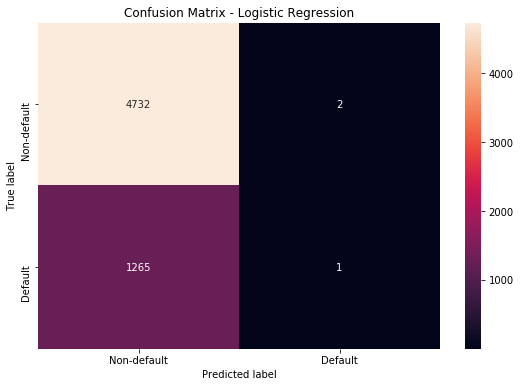

In [155]:
LR1.fit(Xtest, Ytest)
y_pred1 = LR1.predict(Xtest)
print('Accuracy:', metrics.accuracy_score(y_pred1,Ytest))

# 5-fold cross-validation 
from sklearn.model_selection import cross_val_score
cv_scores =cross_val_score(LR1, Xtest, Ytest, cv=5)
print()
print(classification_report(Ytest, y_pred1))
print()

plt.figure(figsize=(9,6))
ConfMatrix = confusion_matrix(Ytest,LR1.predict(Xtest))
sns.heatmap(ConfMatrix,annot=True, fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

## 9) Future reseach

- Providing Financial literacy test before application 
- Investigate latent variables
- Discrimination in the dataset by male and female